In [1]:
# Import necessary libraries for the dataset
!pip install opendatasets
import opendatasets as od
import pandas as pds
from sklearn.neural_network import MLPClassifier

od.download("https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package")


Skipping, found downloaded files in "./weather-dataset-rattle-package" (use force=True to force download)


In [2]:
file =('weather-dataset-rattle-package/weatherAUS.csv')
df = pds.read_csv(file)

# As the dataset is large and contains many locations, we only use data from one city
desired_location = 'Sydney'

df = df[df['Location'] == desired_location]
print(df.head(10))

             Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
30176  2008-02-01   Sydney     19.5     22.4      15.6          6.2       0.0   
30177  2008-02-02   Sydney     19.5     25.6       6.0          3.4       2.7   
30178  2008-02-03   Sydney     21.6     24.5       6.6          2.4       0.1   
30179  2008-02-04   Sydney     20.2     22.8      18.8          2.2       0.0   
30180  2008-02-05   Sydney     19.7     25.7      77.4          NaN       0.0   
30181  2008-02-06   Sydney     20.2     27.2       1.6          2.6       8.6   
30182  2008-02-07   Sydney     18.6     26.3       6.2          5.2       5.2   
30183  2008-02-08   Sydney     17.2     22.3      27.6          5.8       2.1   
30184  2008-02-09   Sydney     16.4     20.8      12.6          4.8       3.0   
30185  2008-02-10   Sydney     14.6     24.2       8.8          4.4      10.1   

      WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
30176         NaN            Na

In [3]:
# For pre-processing:
# No null entries, use scaling on float, transform object to int
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3344 entries, 30176 to 33519
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3344 non-null   object 
 1   Location       3344 non-null   object 
 2   MinTemp        3340 non-null   float64
 3   MaxTemp        3342 non-null   float64
 4   Rainfall       3337 non-null   float64
 5   Evaporation    3293 non-null   float64
 6   Sunshine       3328 non-null   float64
 7   WindGustDir    2306 non-null   object 
 8   WindGustSpeed  2306 non-null   float64
 9   WindDir9am     3288 non-null   object 
 10  WindDir3pm     3311 non-null   object 
 11  WindSpeed9am   3318 non-null   float64
 12  WindSpeed3pm   3319 non-null   float64
 13  Humidity9am    3329 non-null   float64
 14  Humidity3pm    3331 non-null   float64
 15  Pressure9am    3323 non-null   float64
 16  Pressure3pm    3325 non-null   float64
 17  Cloud9am       2776 non-null   float64
 18  Clo

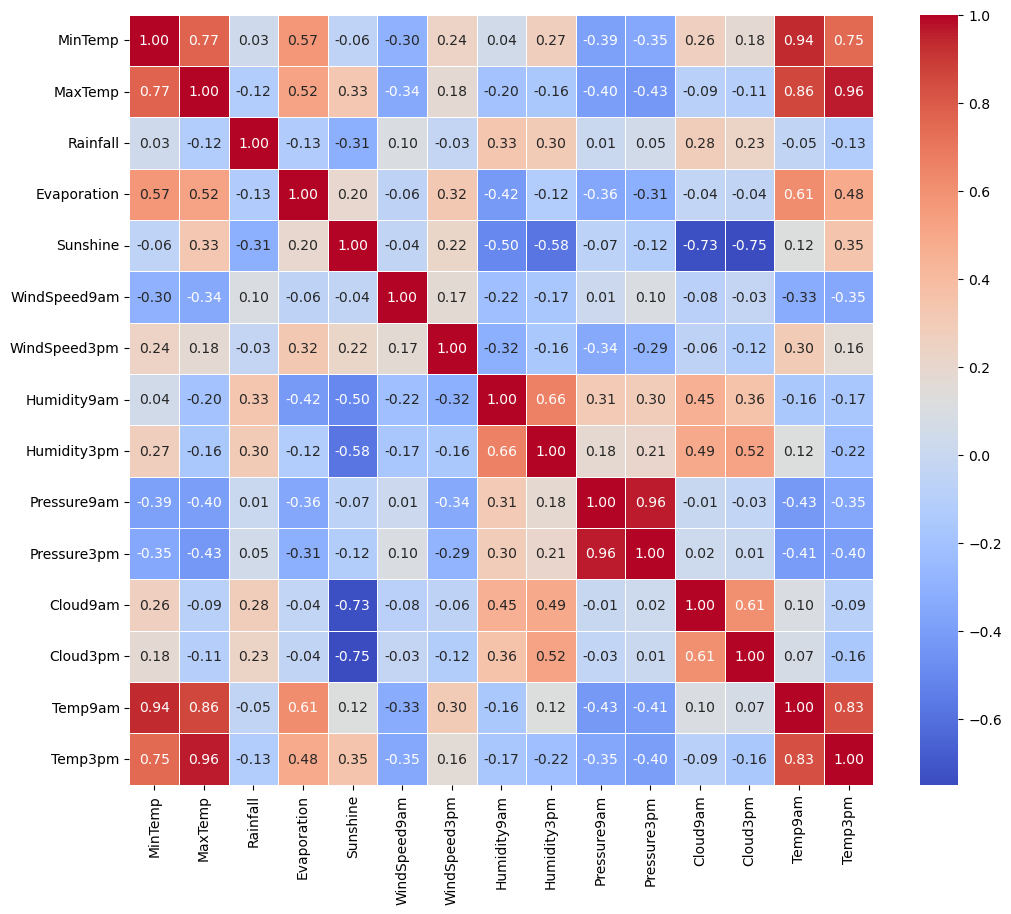

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2615 entries, 30176 to 33519
Data columns (total 49 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MinTemp         2615 non-null   float64
 1   MaxTemp         2615 non-null   float64
 2   Rainfall        2615 non-null   float64
 3   Evaporation     2615 non-null   float64
 4   Sunshine        2615 non-null   float64
 5   WindSpeed9am    2615 non-null   float64
 6   WindSpeed3pm    2615 non-null   float64
 7   Humidity9am     2615 non-null   float64
 8   Humidity3pm     2615 non-null   float64
 9   Pressure9am     2615 non-null   float64
 10  Pressure3pm     2615 non-null   float64
 11  Cloud9am        2615 non-null   float64
 12  Cloud3pm        2615 non-null   float64
 13  Temp9am         2615 non-null   float64
 14  Temp3pm         2615 non-null   float64
 15  RainToday       2615 non-null   int64  
 16  RainTomorrow    2615 non-null   int64  
 17  WindDir9am_E    2615 non-nul

"<class 'pandas.core.frame.DataFrame'>\nInt64Index: 2615 entries, 30176 to 33519\nData columns (total 49 columns):"

In [4]:
# Pre-processing for the float data:

# Import necessary MinMax library
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Select the columns containing float data
float_columns = df.select_dtypes(include=['float64']).columns

# Apply Min-Max scaler
df[float_columns] = scaler.fit_transform(df[float_columns])

# Removing WindGusDir and WindGustSpeed that contain NaN values
df = df.drop(columns=['WindGustDir', 'WindGustSpeed','Date','Location'])

# Removing NaN entries in rows
df = df.dropna()

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap
# Select the columns containing numeric data 
numeric_cols = df.select_dtypes(include='number')

# Create a correlation matrix
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show plot
plt.show()

# Import necessary library
from sklearn.preprocessing import LabelBinarizer

# Using pandas get_dummies method to one-hot encode categorical columns to binary
df = pds.get_dummies(df, columns=['WindDir9am','WindDir3pm'])

# Mapping 'Yes' to 1 and 'No' to 0 in the 'RainToday' and 'RainTomorrow' column
df['RainToday'] = df['RainToday'].replace({'Yes': 1, 'No': 0})
df['RainTomorrow'] = df['RainTomorrow'].replace({'Yes': 1, 'No': 0})


#print(df.head(10))

df.info()
"""<class 'pandas.core.frame.DataFrame'>
Int64Index: 2615 entries, 30176 to 33519
Data columns (total 49 columns):"""


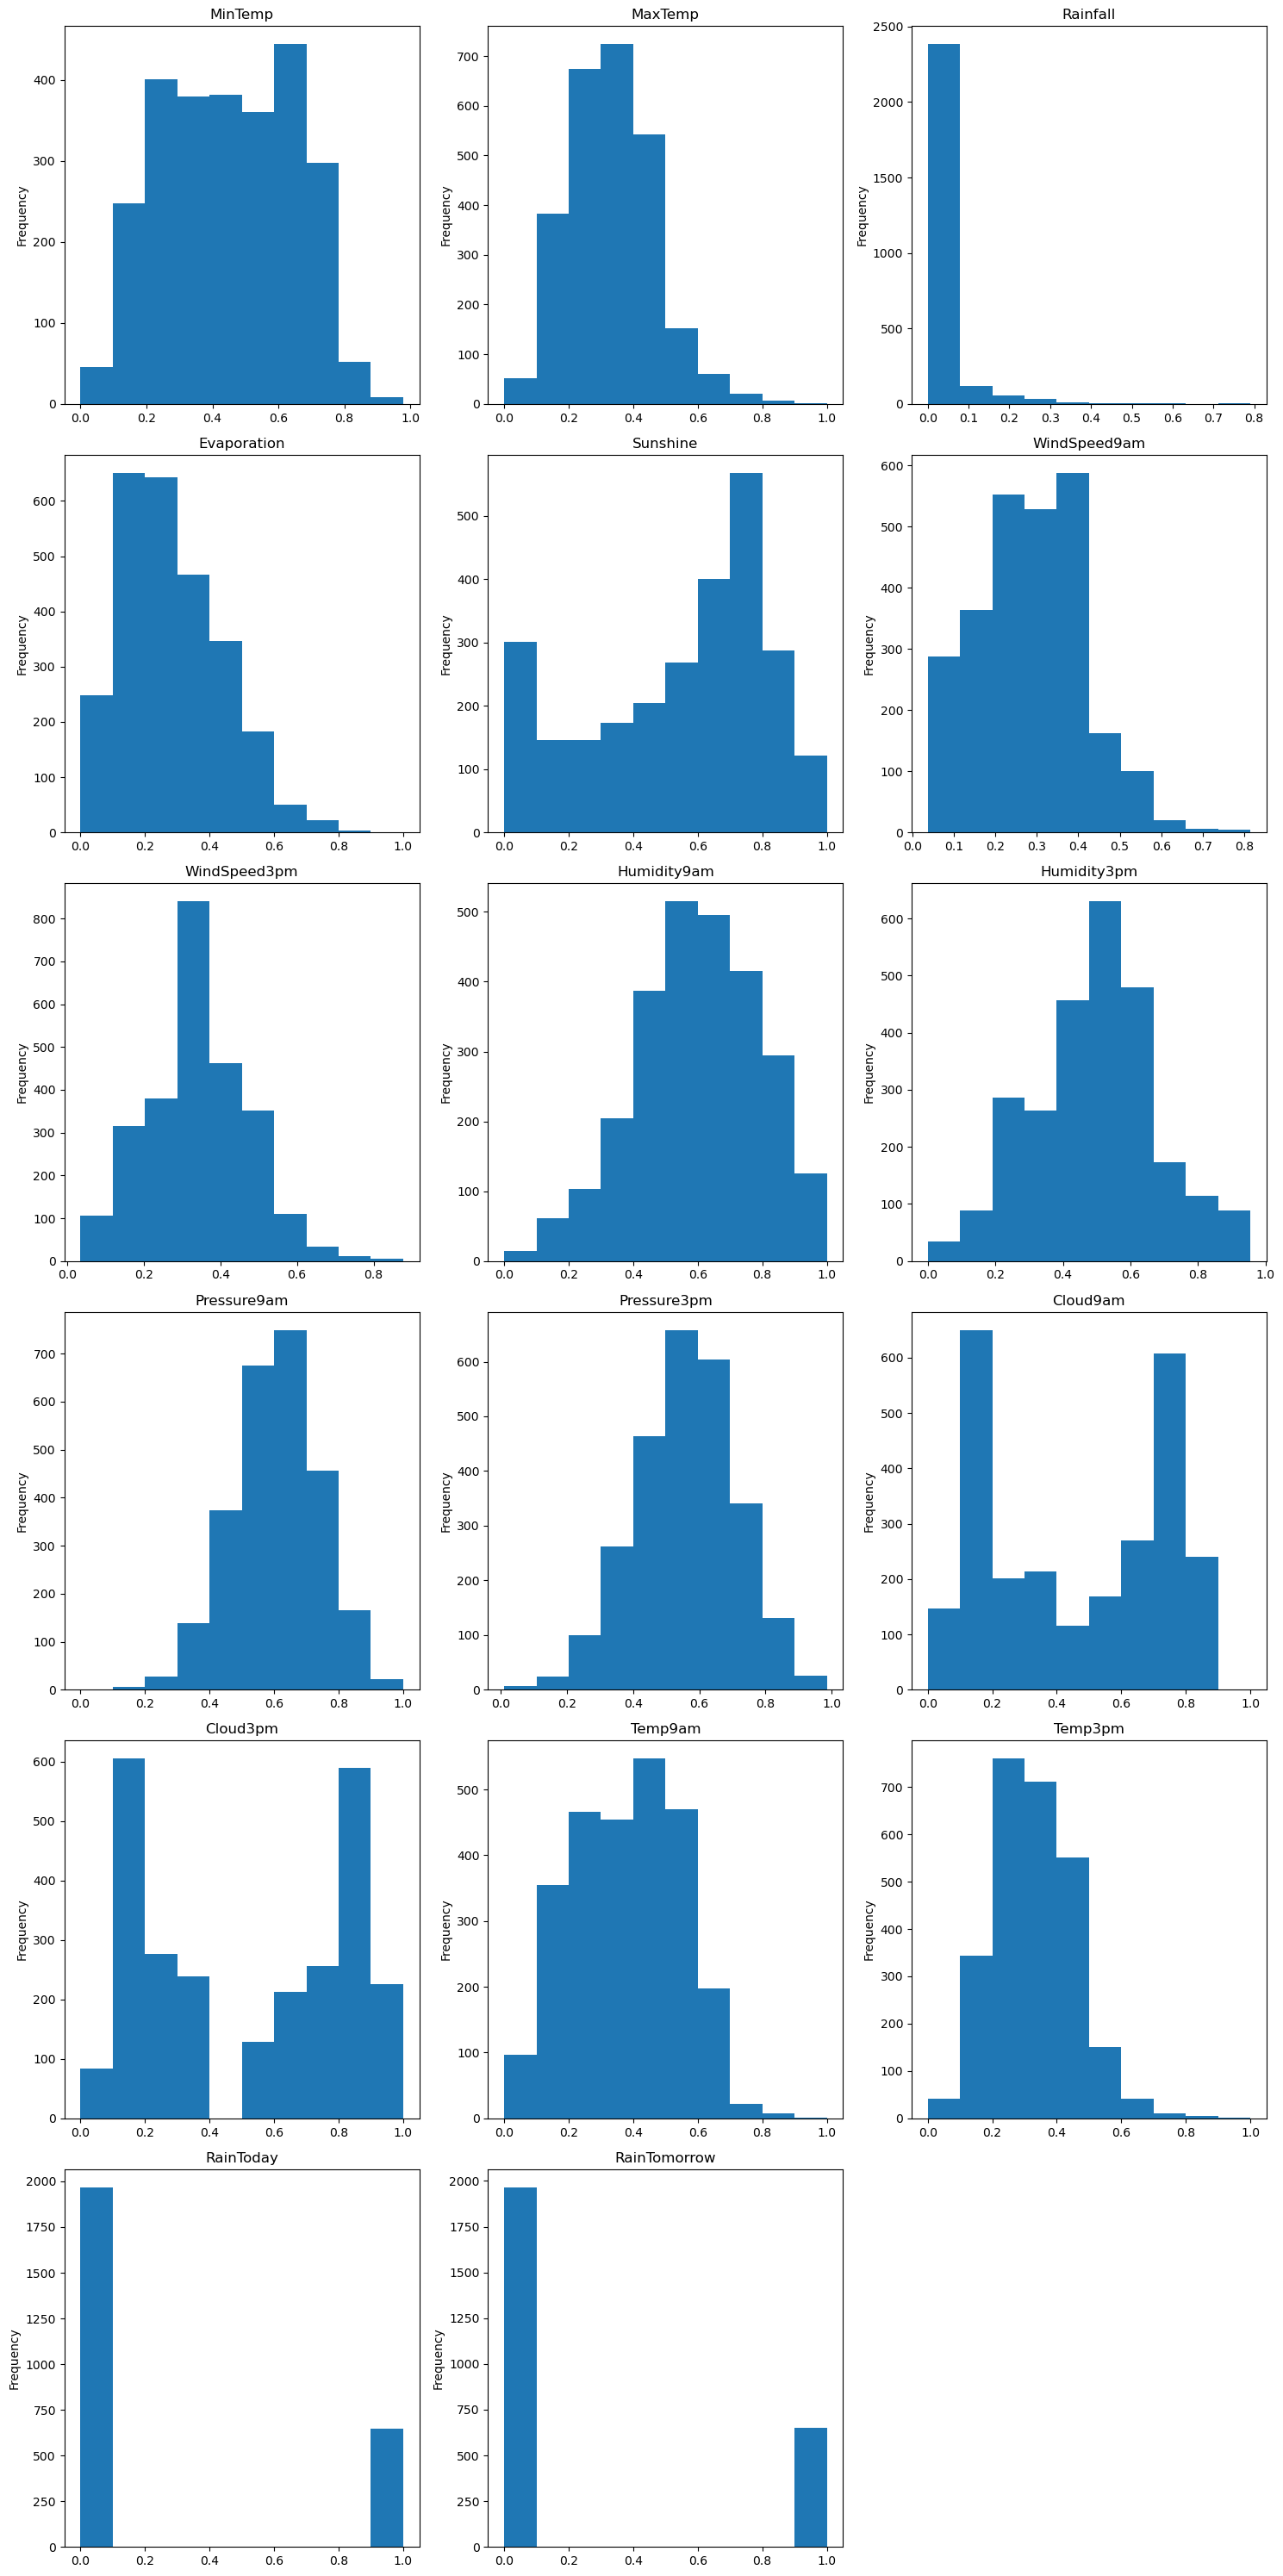

In [5]:
# Import necessary library
import matplotlib.pyplot as plt

# Histrogram of all features with numeric values

# Select columns with numeric data types (int and float)
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Calculate the number of rows
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3 
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram
for i, var in enumerate(int_vars):
    df[var].plot.hist(ax=axs[i])
    axs[i].set_title(var)

# Formatting Columns
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Formatting Spacing
fig.tight_layout()

# Show plot
plt.show()



In [6]:
# X is the dataframe with the prediction column wanted removed
X = df.drop('RainTomorrow', axis = 1)

# y contains the target variable
y = df['RainTomorrow']

from sklearn.model_selection import train_test_split

# Create a test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [7]:
# MLP with the hyperparameters

mlp = MLPClassifier(hidden_layer_sizes=(50), max_iter=100, alpha=1e-4,
                    solver='adam', verbose=1, tol=1e-4,
                    learning_rate_init=.0001)


/Users/adilekutlu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/adilekutlu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/adilekutlu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/adilekutlu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/adilekutl

Iteration 1, loss = 0.82272467
Iteration 2, loss = 0.80252810
Iteration 3, loss = 0.78353118
Iteration 4, loss = 0.76596411
Iteration 5, loss = 0.74933769
Iteration 6, loss = 0.73398174
Iteration 7, loss = 0.71970046
Iteration 8, loss = 0.70633973
Iteration 9, loss = 0.69409483
Iteration 10, loss = 0.68239793
Iteration 11, loss = 0.67172491
Iteration 12, loss = 0.66179020
Iteration 13, loss = 0.65233385
Iteration 14, loss = 0.64379331
Iteration 15, loss = 0.63554147
Iteration 16, loss = 0.62779979
Iteration 17, loss = 0.62056517
Iteration 18, loss = 0.61375253
Iteration 19, loss = 0.60746342
Iteration 20, loss = 0.60127693
Iteration 21, loss = 0.59562352
Iteration 22, loss = 0.59024205
Iteration 23, loss = 0.58523321
Iteration 24, loss = 0.58033225
Iteration 25, loss = 0.57572022
Iteration 26, loss = 0.57128099
Iteration 27, loss = 0.56703421
Iteration 28, loss = 0.56303392
Iteration 29, loss = 0.55900892
Iteration 30, loss = 0.55523151
Iteration 31, loss = 0.55163902
Iteration 32, los

/Users/adilekutlu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


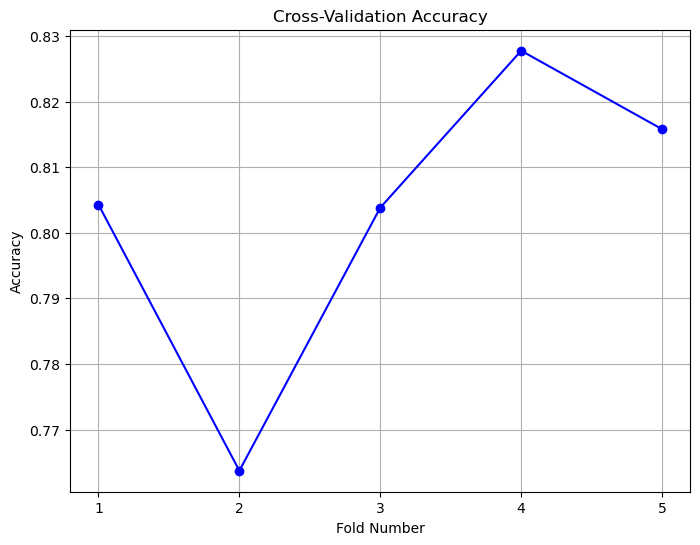

Cross-validated Accuracy: 0.80 (±0.02)
Test Set Accuracy: 0.81


In [8]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


# Initialize cross fold validation

# Determine number of folds
num_folds = 5
cv = KFold(n_splits=num_folds, shuffle=True)

# Store accuracy scores for each fold
scores = cross_val_score(mlp, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# Calculate the mean and standard deviation of scores
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)

# Initialises the training
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

# Calculate the test set accuracy
test_accuracy = accuracy_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(range(1, num_folds + 1), scores, marker='o', linestyle='-', color='b')

# Title and labels
plt.title('Cross-Validation Accuracy')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.xticks(range(1, num_folds + 1))
plt.grid(True)

# Show plot
plt.show()

# Print the results
print(f"Cross-validated Accuracy: {mean_accuracy:.2f} (±{std_accuracy:.2f})")
print(f"Test Set Accuracy: {test_accuracy:.2f}")



Iteration 101, loss = 0.41460762
Iteration 102, loss = 0.41373897
Iteration 103, loss = 0.41290848
Iteration 104, loss = 0.41207163
Iteration 105, loss = 0.41128742
Iteration 106, loss = 0.41052429
Iteration 107, loss = 0.40972326
Iteration 108, loss = 0.40896774
Iteration 109, loss = 0.40829567
Iteration 110, loss = 0.40754786
Iteration 111, loss = 0.40681615
Iteration 112, loss = 0.40614968
Iteration 113, loss = 0.40546299
Iteration 114, loss = 0.40486536
Iteration 115, loss = 0.40413963
Iteration 116, loss = 0.40353122
Iteration 117, loss = 0.40290198
Iteration 118, loss = 0.40230059
Iteration 119, loss = 0.40172877
Iteration 120, loss = 0.40118464
Iteration 121, loss = 0.40064034
Iteration 122, loss = 0.40008296
Iteration 123, loss = 0.39956001
Iteration 124, loss = 0.39902501
Iteration 125, loss = 0.39847985
Iteration 126, loss = 0.39797294
Iteration 127, loss = 0.39745335
Iteration 128, loss = 0.39694784
Iteration 129, loss = 0.39642188
Iteration 130, loss = 0.39597642
Iteration 

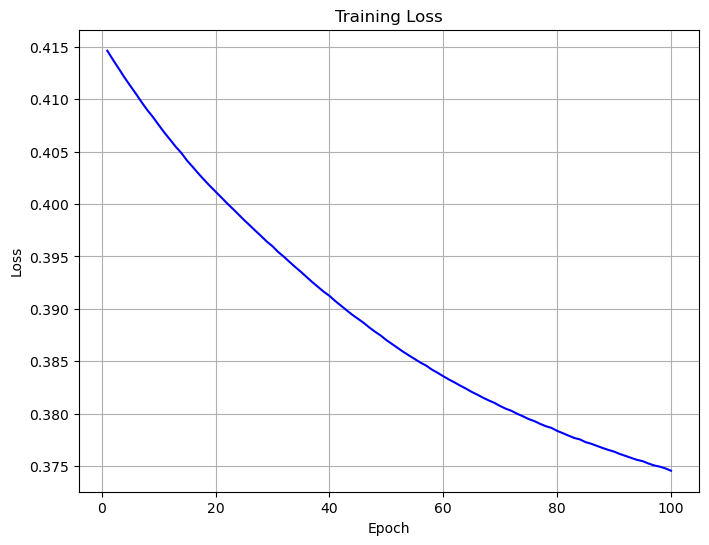

In [9]:
# Storing loss values
training_losses = []

for epoch in range(100):
    mlp.partial_fit(X_train, y_train, classes=[False, True])
    loss = mlp.loss_
    training_losses.append(loss)
    
# Plot
plt.figure(figsize=(8, 6)) 

plt.plot(range(1, 101), training_losses, color='b')

#. Title and labels
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# Show plot
plt.show()

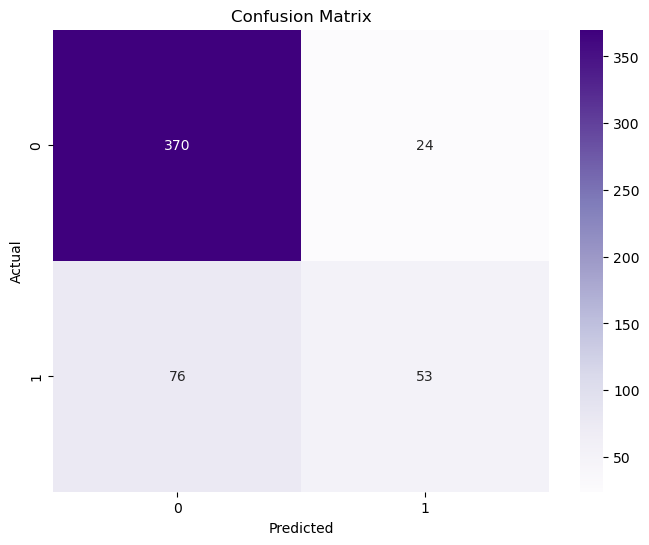

Iteration 1, loss = 0.66747157
Iteration 2, loss = 0.65898286
Iteration 3, loss = 0.65099428
Iteration 4, loss = 0.64321425
Iteration 5, loss = 0.63606025
Iteration 6, loss = 0.62905406
Iteration 7, loss = 0.62258883
Iteration 8, loss = 0.61633620
Iteration 9, loss = 0.61044422
Iteration 10, loss = 0.60485472
Iteration 11, loss = 0.59965251
Iteration 12, loss = 0.59463161
Iteration 13, loss = 0.58972547
Iteration 14, loss = 0.58513937
Iteration 15, loss = 0.58064991
Iteration 16, loss = 0.57671827
Iteration 17, loss = 0.57251925
Iteration 18, loss = 0.56875748
Iteration 19, loss = 0.56520096
Iteration 20, loss = 0.56166584
Iteration 21, loss = 0.55841653
Iteration 22, loss = 0.55517633
Iteration 23, loss = 0.55205573
Iteration 24, loss = 0.54913087
Iteration 25, loss = 0.54623483
Iteration 26, loss = 0.54352116
Iteration 27, loss = 0.54100168
Iteration 28, loss = 0.53840894
Iteration 29, loss = 0.53596513
Iteration 30, loss = 0.53351483
Iteration 31, loss = 0.53108664
Iteration 32, los

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix with test and predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples")

# Title and labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")


# Show plot
plt.show()

